## 머신러닝으로 할 수 있는 것
- 편지봉투에 손으로 쓴 우편번호 숫자 자동 판별
- 의료 영상 이미지에 기반한, 종양 판단
- 의심되는 신용카드 거래 감지
- 블로그 글의 주제 분류
- 고객들을 취향이 비슷한 그룹으로 묶기

## 문제와 데이터 이해하기
- 가지고 있는 데이터가 내가 원하는 문제의 답을 가지고 있는가?
- 내 문제를 가장 잘 해결할 수 있는 머신러닝 방법은 무엇인가
- 문제를 풀기에 충분한 데이터를 모았는가?
- 머신러닝의 성과를 어떻게 측정할 것인가

# 머신러닝
## Regression과 Classification
### Regression
- 예 ) 어떤 사람의 교육수준, 나이, 주거지를 바탕으로 연간 소득을 예측하는 것
- 예 ) 옥수수 농장에서 전년도 수확량과 날씨, 고용 인원수 등으로 올해 수확량을 예측하는 것
### Classification
- 예) 웹사이트가 어떤 언어로 되어있는가
- 예) 사진을 보고, 고양이 인지 강아지 인지, 소인지 분류

## Training과 Test
훈련이란, 데이터를 입력하고, 그 결과인 레이블이 나오도록 만드는 과정.  
즉, 데이터와 레이블을 통해 학습을 시키는 과정  

테스트란, 학습이 완료된 분류기에 학습에 사용하지 않은 데이터를 넣어서 정답을 맞추는지 확인하는 작업

## Generaliazation
모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있으면 이를 훈련 세트에서 테스트 세트로 일반화되었다고 함.

## Overfitting / Underfitting
오버핏팅이란 학습한 결과과, 학습에 사용된 데이터와 거의 일치하여, 새로운 데이터가 들어왔을 때, 예측이 틀려 버리는 상태  

새로운 데이터에 일반화되기 어렵다.  

언더핏팅은, 그 반대다.  
  
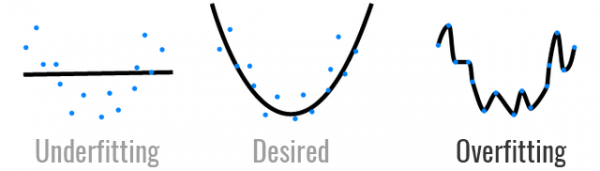

## 성능 측정
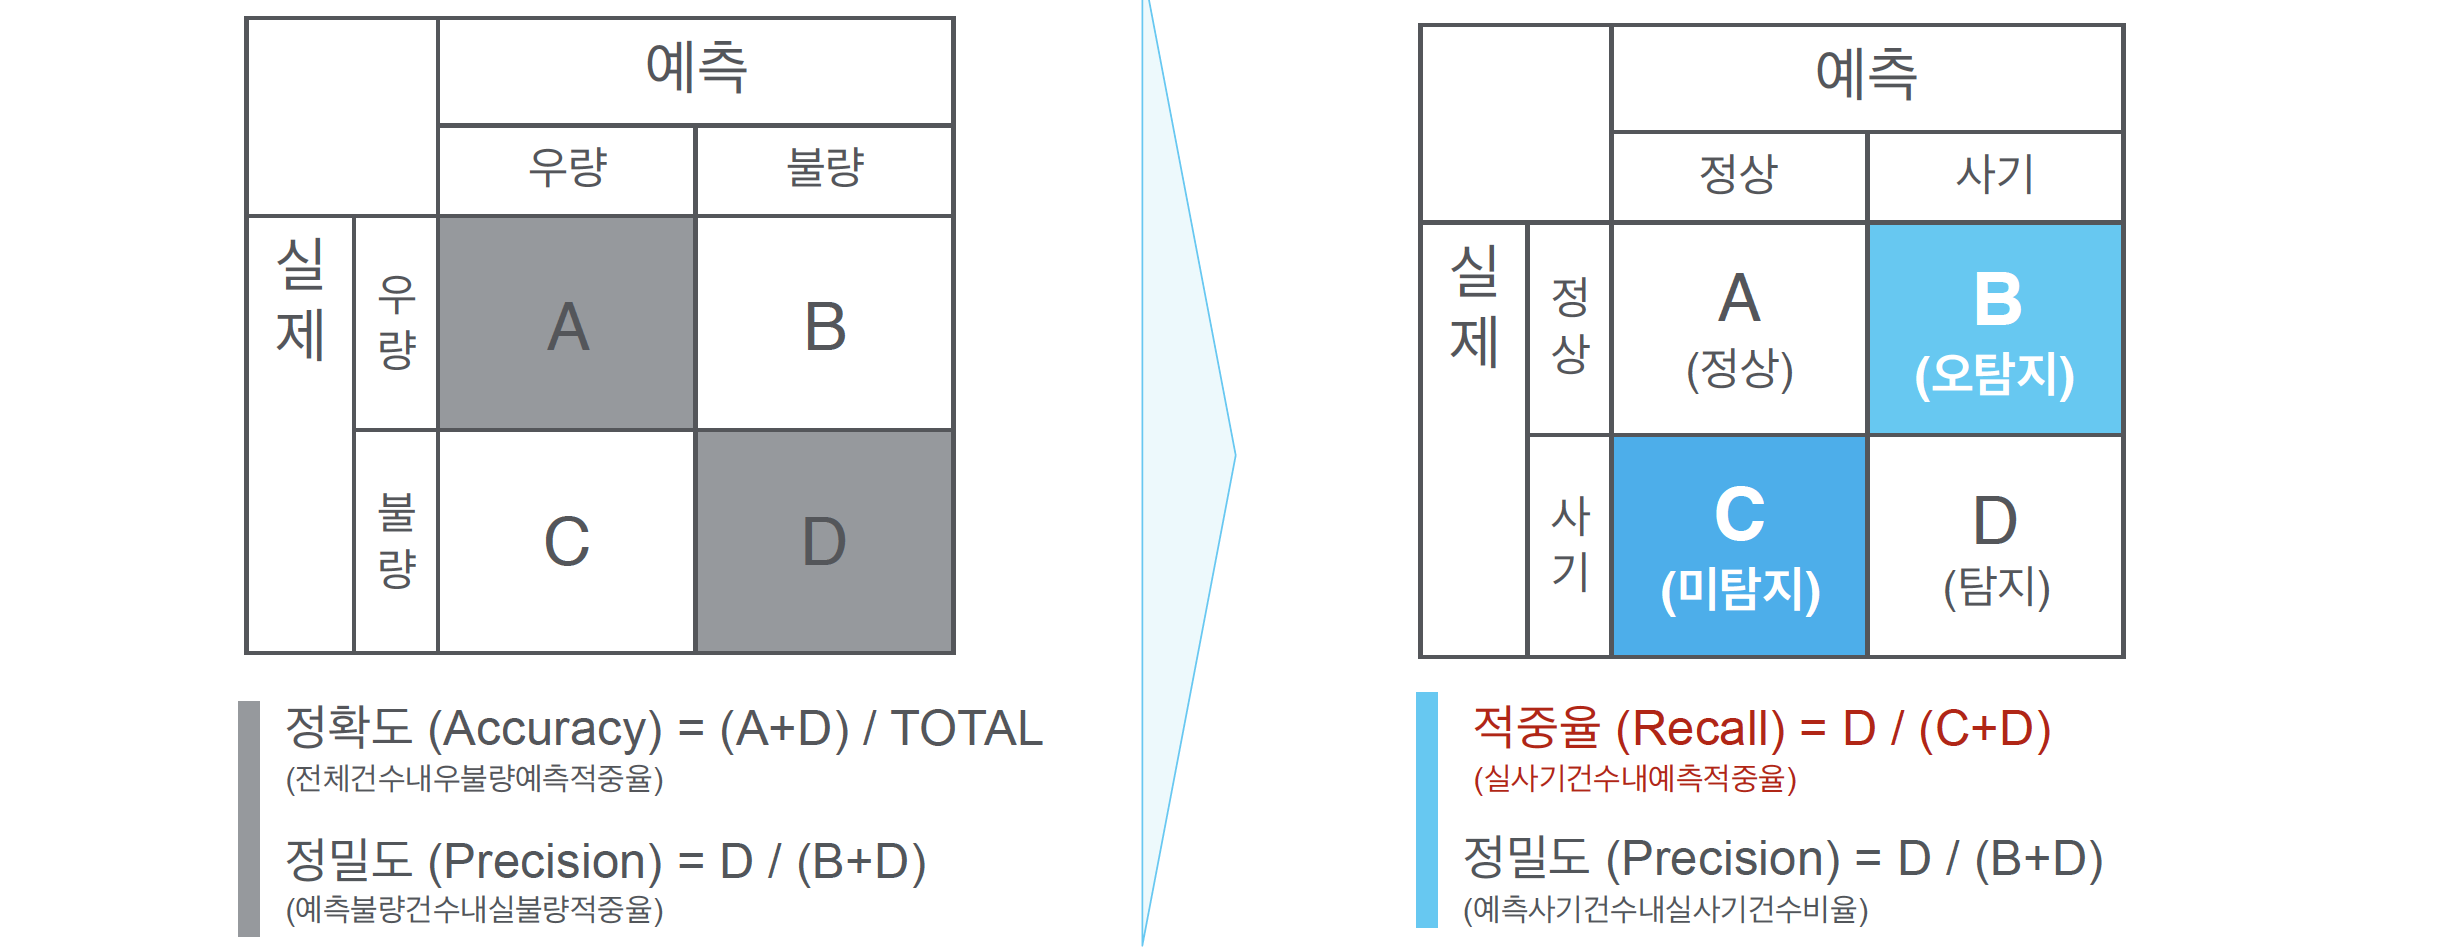

# 데이터 전처리

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 데이터셋 로딩 및 df 만들기

In [2]:
df = pd.read_csv('./datas_ml/Data.csv')

In [3]:
# 온라인 쇼핑몰 고객 데이터라고 가정. 이 쇼핑몰에서 물건을 구매했으면 Purchase에 yes, 구매하지 않았으면 no로 표시
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [4]:
df['Purchased'].value_counts()

Purchased
No     5
Yes    5
Name: count, dtype: int64

In [5]:
df.columns

Index(['Country', 'Age', 'Salary', 'Purchased'], dtype='object')

In [6]:
df['Country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

# 결측치(NaN) 처리

In [7]:
# 결측치(NaN) 처리
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [8]:
df.isna().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

## 결측치 처리 방법
- 삭제하거나 채워야함
### 삭제하기

In [9]:
# NaN이 포함된 행을 삭제 (df에 반영)
df.dropna()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
5,France,35.0,58000.0,Yes
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


### 채우기 전략
- 0, 평균, 중앙값, 최빈값

In [10]:
df.fillna(0)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,0.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,0.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [11]:
df.fillna(df['Age'].mean())

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,38.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


In [12]:
df.mean(numeric_only=True)

Age          38.777778
Salary    63777.777778
dtype: float64

In [13]:
# 숫자 컬럼의 평균값으로 결측치 채우기
df.fillna(df.mean(numeric_only=True), inplace=True)
df

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


In [14]:
# index 초기화(reset) 하기
df.reset_index(drop=True, inplace=True)
df

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


# x, y 데이터를 분리(분할)
- x: 독립변수(Feature)
- y: 종속변수(Target, Label)

In [ ]:
# 우리가 예축하고자 하는 것 y
y = df['Purchased']
y

0     No
1    Yes
2     No
3     No
4    Yes
5    Yes
6     No
7    Yes
8     No
9    Yes
Name: Purchased, dtype: object

In [16]:
# X 컬럼: Country, Age, Salary
# X = df.loc[행, 열]
X = df.loc[:, 'Country' : 'Salary']
X

,Country,Age,Salary
0,France,44.000000,72000.000000
1,Spain,27.000000,48000.000000
2,Germany,30.000000,54000.000000
3,Spain,38.000000,61000.000000
4,Germany,40.000000,63777.777778
5,France,35.000000,58000.000000
6,Spain,38.777778,52000.000000
7,France,48.000000,79000.000000
8,Germany,50.000000,83000.000000
9,France,37.000000,67000.000000


In [17]:
df['Country'].value_counts()

Country
France     4
Spain      3
Germany    3
Name: count, dtype: int64

# 레이블 인코딩, One Hot Encoding
- 범주형(문자) 데이터를 숫자로 변환
- 레이블 인코딩 : 문자열 -> 0, 1, 2,...
- One Hot Encoding : 

## 레이블 인코딩하는 방법

In [2]:
# 라이브러리 로딩
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [19]:
# 객체 생성
encoder = LabelEncoder()

In [20]:
encoder

LabelEncoder()

In [21]:
X['Country']

0     France
1      Spain
2    Germany
3      Spain
4    Germany
5     France
6      Spain
7     France
8    Germany
9     France
Name: Country, dtype: object

In [22]:
encoder.fit_transform(X['Country'])

array([0, 2, 1, 2, 1, 0, 2, 0, 1, 0])

In [23]:
X

,Country,Age,Salary
0,France,44.000000,72000.000000
1,Spain,27.000000,48000.000000
2,Germany,30.000000,54000.000000
3,Spain,38.000000,61000.000000
4,Germany,40.000000,63777.777778
5,France,35.000000,58000.000000
6,Spain,38.777778,52000.000000
7,France,48.000000,79000.000000
8,Germany,50.000000,83000.000000
9,France,37.000000,67000.000000


## One Hot Encoding 하는 방법

In [3]:
from sklearn.compose import ColumnTransformer

In [25]:
# 객체 생성
# ct = ColumnTransformer([('encoder', OneHotEncoder(), [컬럼인덱스1, 컬럼인덱스2])])
ct = ColumnTransformer([('encoder', OneHotEncoder(),[0])])

In [26]:
# One Hot Encoding으로 변환
ct.fit_transform(X)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [27]:
X['Country'] = encoder.fit_transform(X['Country'])

In [28]:
X.head()

,Country,Age,Salary
0,0,44.0,72000.000000
1,2,27.0,48000.000000
2,1,30.0,54000.000000
3,2,38.0,61000.000000
4,1,40.0,63777.777778


In [29]:
# 머신러닝을 위한 One Hot Encoding 전체 코드
ct = ColumnTransformer([('encoder', OneHotEncoder(),[0])], remainder='passthrough')
X = ct.fit_transform(X)

## y 데이터 인코딩

In [30]:
y.value_counts()

Purchased
No     5
Yes    5
Name: count, dtype: int64

In [31]:
y = y.map({'Yes':1, 'No':0})
y

0    0
1    1
2    0
3    0
4    1
5    1
6    0
7    1
8    0
9    1
Name: Purchased, dtype: int64

In [32]:
X[:5]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.40000000e+01,
        7.20000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 2.70000000e+01,
        4.80000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 3.00000000e+01,
        5.40000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.80000000e+01,
        6.10000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 4.00000000e+01,
        6.37777778e+04]])

In [33]:
# X, y 인코딩이 끝났으면, Feature Scaling(특성 스케일링) 진행

# Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [36]:
# 표준화(평균 0, 표준편차 1인 정규분포를 따르는 범위 데이터로 변환)
# 객체생성
scaler = StandardScaler()

# 변환
X_scaled = scaler.fit_transform(X)

In [ ]:
# 정규화(0~1 사이의 범위 데이터로 변환)
scaler = MinMaxScaler()
scaler.fit_transform(X)

array([[1.        , 0.        , 0.        , 0.73913043, 0.68571429],
       [0.        , 0.        , 1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.13043478, 0.17142857],
       [0.        , 0.        , 1.        , 0.47826087, 0.37142857],
       [0.        , 1.        , 0.        , 0.56521739, 0.45079365],
       [1.        , 0.        , 0.        , 0.34782609, 0.28571429],
       [0.        , 0.        , 1.        , 0.51207729, 0.11428571],
       [1.        , 0.        , 0.        , 0.91304348, 0.88571429],
       [0.        , 1.        , 0.        , 1.        , 1.        ],
       [1.        , 0.        , 0.        , 0.43478261, 0.54285714]])

In [ ]:
# 데이터 전처리한 것들
# 1. 결측치 처리
# 2. X, y 데이터 분리 : 
# 3. X, y 인코딩(문자를 숫자로 변환) : ML은 숫자만 입력 가능하므로
# 4. Feature Scaling(특성 스케일링) : 데이터의 수준을 맞추기 위함, X(독립변수)만 함

## Train, Test 데이터 분할하기

In [37]:
X_scaled

array([[ 1.22474487e+00, -6.54653671e-01, -6.54653671e-01,
         7.58874362e-01,  7.49473254e-01],
       [-8.16496581e-01, -6.54653671e-01,  1.52752523e+00,
        -1.71150388e+00, -1.43817841e+00],
       [-8.16496581e-01,  1.52752523e+00, -6.54653671e-01,
        -1.27555478e+00, -8.91265492e-01],
       [-8.16496581e-01, -6.54653671e-01,  1.52752523e+00,
        -1.13023841e-01, -2.53200424e-01],
       [-8.16496581e-01,  1.52752523e+00, -6.54653671e-01,
         1.77608893e-01,  6.63219199e-16],
       [ 1.22474487e+00, -6.54653671e-01, -6.54653671e-01,
        -5.48972942e-01, -5.26656882e-01],
       [-8.16496581e-01, -6.54653671e-01,  1.52752523e+00,
         0.00000000e+00, -1.07356980e+00],
       [ 1.22474487e+00, -6.54653671e-01, -6.54653671e-01,
         1.34013983e+00,  1.38753832e+00],
       [-8.16496581e-01,  1.52752523e+00, -6.54653671e-01,
         1.63077256e+00,  1.75214693e+00],
       [ 1.22474487e+00, -6.54653671e-01, -6.54653671e-01,
        -2.58340208e-01

In [5]:
from sklearn.model_selection import train_test_split

In [39]:
# traom:test -> 8:2
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [40]:
X_train.shape, y_train.shape

((8, 5), (8,))

In [41]:
X_test.shape, y_test.shape

((2, 5), (2,))

# 자동차 판매 예측

In [7]:
df = pd.read_csv('datas_ml/cars.csv')
df

,Brand,Model,Year,Mileage,EngineSize,FuelType,Color,Region,ConditionDesc,SellerType,Price
0,Ford,Escape,2001.0,287486.0,4.800248,Diesel,Black,Daejeon,like new,Dealer,580
1,Mercedes,E-Class,2014.0,168229.0,4.802429,Gasoline,White,Seoul,NaN,Dealer,1835
2,Mercedes,E-Class,2023.0,106081.0,3.293752,Gasoline,Red,Incheon,engine issue,Dealer,2226
3,Kia,Sorento,2009.0,89045.0,3.527349,Gasoline,NaN,Daegu,minor scratch on bumper,Dealer,1050
4,Ford,Escape,2005.0,34698.0,2.793782,Hybrid,Black,Seoul,NaN,Private,1290
...,...,...,...,...,...,...,...,...,...,...,...
295,Ford,Focus,2017.0,178352.0,2.289415,Diesel,Black,Daegu,slight dent,Private,1166
296,Kia,Sorento,2005.0,79459.0,4.239498,Hybrid,Black,Busan,needs painting,Dealer,1045
297,Hyundai,Tucson,2018.0,195004.0,2.018563,Gasoline,Gray,Seoul,no major problems,Dealer,1265
298,Mercedes,C-Class,2021.0,200968.0,3.726011,Gasoline,Black,Busan,no major problems,Dealer,1947


In [8]:
df.shape

(300, 11)

In [9]:
df.isna().sum()

Brand             0
Model             0
Year             15
Mileage          20
EngineSize        0
FuelType          0
Color            10
Region            8
ConditionDesc    25
SellerType        0
Price             0
dtype: int64

In [10]:
df_clean = df.dropna().copy()
df_clean

,Brand,Model,Year,Mileage,EngineSize,FuelType,Color,Region,ConditionDesc,SellerType,Price
0,Ford,Escape,2001.0,287486.0,4.800248,Diesel,Black,Daejeon,like new,Dealer,580
2,Mercedes,E-Class,2023.0,106081.0,3.293752,Gasoline,Red,Incheon,engine issue,Dealer,2226
6,Ford,Explorer,2023.0,22671.0,2.314658,EV,Black,Daegu,regular maintenance done,Private,2058
8,Mercedes,E-Class,2001.0,51663.0,4.009498,Diesel,Gray,Daejeon,dashboard damage,Private,1371
9,BMW,X5,2020.0,15708.0,4.166316,Hybrid,Black,Busan,noise in suspension,Private,2342
...,...,...,...,...,...,...,...,...,...,...,...
295,Ford,Focus,2017.0,178352.0,2.289415,Diesel,Black,Daegu,slight dent,Private,1166
296,Kia,Sorento,2005.0,79459.0,4.239498,Hybrid,Black,Busan,needs painting,Dealer,1045
297,Hyundai,Tucson,2018.0,195004.0,2.018563,Gasoline,Gray,Seoul,no major problems,Dealer,1265
298,Mercedes,C-Class,2021.0,200968.0,3.726011,Gasoline,Black,Busan,no major problems,Dealer,1947


In [11]:
df_clean.shape

(227, 11)

In [22]:
y = df_clean['Price']
y

0       580
2      2226
6      2058
8      1371
9      2342
       ... 
295    1166
296    1045
297    1265
298    1947
299    1489
Name: Price, Length: 227, dtype: int64

In [13]:
X = df_clean.drop('Price', axis = 1)
X

,Brand,Model,Year,Mileage,EngineSize,FuelType,Color,Region,ConditionDesc,SellerType
0,Ford,Escape,2001.0,287486.0,4.800248,Diesel,Black,Daejeon,like new,Dealer
2,Mercedes,E-Class,2023.0,106081.0,3.293752,Gasoline,Red,Incheon,engine issue,Dealer
6,Ford,Explorer,2023.0,22671.0,2.314658,EV,Black,Daegu,regular maintenance done,Private
8,Mercedes,E-Class,2001.0,51663.0,4.009498,Diesel,Gray,Daejeon,dashboard damage,Private
9,BMW,X5,2020.0,15708.0,4.166316,Hybrid,Black,Busan,noise in suspension,Private
...,...,...,...,...,...,...,...,...,...,...
295,Ford,Focus,2017.0,178352.0,2.289415,Diesel,Black,Daegu,slight dent,Private
296,Kia,Sorento,2005.0,79459.0,4.239498,Hybrid,Black,Busan,needs painting,Dealer
297,Hyundai,Tucson,2018.0,195004.0,2.018563,Gasoline,Gray,Seoul,no major problems,Dealer
298,Mercedes,C-Class,2021.0,200968.0,3.726011,Gasoline,Black,Busan,no major problems,Dealer


## 문자열 데이터 처리

In [14]:
# 컬럼 삭제
X = X.drop('ConditionDesc', axis = 1)
X

,Brand,Model,Year,Mileage,EngineSize,FuelType,Color,Region,SellerType
0,Ford,Escape,2001.0,287486.0,4.800248,Diesel,Black,Daejeon,Dealer
2,Mercedes,E-Class,2023.0,106081.0,3.293752,Gasoline,Red,Incheon,Dealer
6,Ford,Explorer,2023.0,22671.0,2.314658,EV,Black,Daegu,Private
8,Mercedes,E-Class,2001.0,51663.0,4.009498,Diesel,Gray,Daejeon,Private
9,BMW,X5,2020.0,15708.0,4.166316,Hybrid,Black,Busan,Private
...,...,...,...,...,...,...,...,...,...
295,Ford,Focus,2017.0,178352.0,2.289415,Diesel,Black,Daegu,Private
296,Kia,Sorento,2005.0,79459.0,4.239498,Hybrid,Black,Busan,Dealer
297,Hyundai,Tucson,2018.0,195004.0,2.018563,Gasoline,Gray,Seoul,Dealer
298,Mercedes,C-Class,2021.0,200968.0,3.726011,Gasoline,Black,Busan,Dealer


In [15]:
# X 문자열 컬럼 2개인지, 3개 이상인지 확인
X['Brand'].nunique()

5

In [16]:
X['Model'].nunique()

20

In [18]:
X['FuelType'].nunique()

4

In [19]:
X['Color'].nunique()

6

In [20]:
X['Region'].nunique()

5

In [21]:
X['SellerType'].nunique()

2

## 인코딩할 컬럼 구분
- 레이블 인코딩 할 컬럼
- 원한 인코딩 할 컬럼
- 숫자 데이터 -> 피처스케일링 해야 함

In [23]:
X.head()

,Brand,Model,Year,Mileage,EngineSize,FuelType,Color,Region,SellerType
0,Ford,Escape,2001.0,287486.0,4.800248,Diesel,Black,Daejeon,Dealer
2,Mercedes,E-Class,2023.0,106081.0,3.293752,Gasoline,Red,Incheon,Dealer
6,Ford,Explorer,2023.0,22671.0,2.314658,EV,Black,Daegu,Private
8,Mercedes,E-Class,2001.0,51663.0,4.009498,Diesel,Gray,Daejeon,Private
9,BMW,X5,2020.0,15708.0,4.166316,Hybrid,Black,Busan,Private


In [24]:
X.columns

Index(['Brand', 'Model', 'Year', 'Mileage', 'EngineSize', 'FuelType', 'Color',
       'Region', 'SellerType'],
      dtype='object')

## 현업방법 - 데이터 전처리

In [25]:
label_cols = ['SellerType']
onehot_cols = ['Brand', 'Model', 'FuelType', 'Color', 'Region']
numeric_cols = ['Year', 'Mileage', 'EngineSize']

In [26]:
from sklearn.preprocessing import OrdinalEncoder

In [27]:
ct = ColumnTransformer([('label', OrdinalEncoder(), label_cols),
                       ('onehot', OneHotEncoder(), onehot_cols),
                       ('Scaler', StandardScaler(), numeric_cols)])

In [28]:
ct

,transformers,"[('label', ...), ('onehot', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'


In [30]:
print(ct.fit_transform(X))

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1917 stored elements and shape (227, 44)>
  Coords	Values
  (0, 2)	1.0
  (0, 11)	1.0
  (0, 26)	1.0
  (0, 30)	1.0
  (0, 38)	1.0
  (0, 41)	-0.9249768106545554
  (0, 42)	1.7880660195193743
  (0, 43)	1.5429197838977786
  (1, 5)	1.0
  (1, 10)	1.0
  (1, 28)	1.0
  (1, 33)	1.0
  (1, 39)	1.0
  (1, 41)	1.4354392304332764
  (1, 42)	-0.3546402183717234
  (1, 43)	0.2937526938363846
  (2, 0)	1.0
  (2, 2)	1.0
  (2, 12)	1.0
  (2, 27)	1.0
  (2, 30)	1.0
  (2, 37)	1.0
  (2, 41)	1.4354392304332764
  (2, 42)	-1.3398563221312474
  (2, 43)	-0.5180987553925732
  :	:
  (224, 3)	1.0
  (224, 23)	1.0
  (224, 28)	1.0
  (224, 32)	1.0
  (224, 40)	1.0
  (224, 41)	0.8989810392769509
  (224, 42)	0.6956939333439961
  (224, 43)	-0.7636173326615148
  (225, 5)	1.0
  (225, 9)	1.0
  (225, 28)	1.0
  (225, 30)	1.0
  (225, 36)	1.0
  (225, 41)	1.2208559539707462
  (225, 42)	0.7661390699321965
  (225, 43)	0.6521764959891053
  (226, 0)	1.0
  (226, 2)	1.0
  (226, 11)	1.0

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor